In [18]:
from platform import python_version
print("Python Version :",python_version())
import pandas as pd
import numpy as np
pd.set_option("precision",3)
#For ML Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

Python Version : 3.8.10


In [11]:
data=pd.read_csv("sonar.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R


# Comment on data format

## ----------

In [12]:
print(data.shape)
data.describe()


(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [13]:
#This is a classification problem. 
#It can be useful to check the class distribution
data.groupby(data.columns[-1]).size()

60
M    111
R     97
dtype: int64

In [34]:
X=data.iloc[:,:-1]
print(X)
Y=data.iloc[:,-1]
print(Y)

        0      1      2      3      4      5      6      7      8      9   \
0    0.020  0.037  0.043  0.021  0.095  0.099  0.154  0.160  0.311  0.211   
1    0.045  0.052  0.084  0.069  0.118  0.258  0.216  0.348  0.334  0.287   
2    0.026  0.058  0.110  0.108  0.097  0.228  0.243  0.377  0.560  0.619   
3    0.010  0.017  0.062  0.021  0.021  0.037  0.110  0.128  0.060  0.126   
4    0.076  0.067  0.048  0.039  0.059  0.065  0.121  0.247  0.356  0.446   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
203  0.019  0.035  0.017  0.018  0.039  0.163  0.203  0.169  0.233  0.268   
204  0.032  0.010  0.030  0.056  0.076  0.096  0.099  0.102  0.103  0.215   
205  0.052  0.044  0.018  0.029  0.035  0.117  0.126  0.118  0.126  0.253   
206  0.030  0.035  0.049  0.061  0.017  0.135  0.146  0.112  0.195  0.235   
207  0.026  0.036  0.014  0.027  0.021  0.034  0.066  0.140  0.184  0.235   

     ...     50     51     52     53     54     55     56     57     58    

In [43]:
from sklearn.preprocessing import StandardScaler,Normalizer
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
print(rescaledX)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]


In [46]:
# Normalize data (length of 1)
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarize transformed data
#set_printoptions(precision=3)
print(normalizedX)

[[0.00676535 0.01254972 0.01447785 ... 0.00284145 0.00304441 0.00108246]
 [0.01516552 0.01750897 0.02822192 ... 0.00164042 0.00174085 0.00147303]
 [0.00728921 0.01619206 0.03057573 ... 0.00456271 0.00264303 0.00217007]
 ...
 [0.01750005 0.01465043 0.0060345  ... 0.00462645 0.00258143 0.00103928]
 [0.01056924 0.01231334 0.01709217 ... 0.00275568 0.00125575 0.00167434]
 [0.00871713 0.01217045 0.00455973 ... 0.00120699 0.00204517 0.00385565]]


[2.76947227e-01 3.12836172e-01 2.57607246e-01 5.22356600e-01
 4.19520499e-01 1.21090758e-01 8.54699230e-02 3.99063367e-01
 1.68412856e+00 2.08995257e+00 2.89395104e+00 2.49726600e+00
 1.47261917e+00 4.67062447e-01 8.96269601e-02 3.97006160e-03
 5.45014525e-04 6.68306726e-03 5.21296607e-01 1.27389237e+00
 1.33129635e+00 8.80297547e-01 3.25085150e-01 9.64595178e-02
 1.17733743e-02 1.31087975e-02 5.38109726e-02 1.14167780e-01
 2.49800624e-02 3.09060700e-04 2.30380212e-01 6.55002088e-02
 2.43087797e-01 8.12184574e-01 1.83529467e+00 2.71819152e+00
 1.43128115e+00 4.54013489e-02 8.15514258e-02 2.74056736e-02
 9.18949396e-03 4.40002996e-01 8.88761744e-01 1.28767382e+00
 2.77966705e+00 2.15914802e+00 1.16334560e+00 9.56715439e-01
 6.35977962e-01 6.14716388e-02 1.59700811e-01 1.19280229e-01
 1.93934453e-02 3.36571616e-02 1.02377508e-02 1.38585112e-02
 7.70968750e-07 3.69810915e-02 1.70464977e-02 6.52995936e-03]


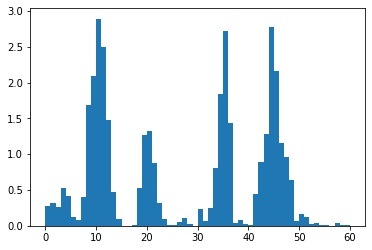

In [49]:
from numpy import set_printoptions

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
#set_printoptions(precision=3)
print(fit.scores_)
plt.figure()
plt.hist(np.arange(0,len(fit.scores_)),bins=len(fit.scores_),range=(0,len(fit.scores_)),weights=fit.scores_)
plt.show()

In [50]:
X_new = SelectKBest(score_func=chi2, k=30).fit_transform(X, Y)
X_new.shape

(208, 30)

In [21]:
test_size=0.2
seed=7

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=test_size,random_state=4)

In [53]:
print(X_train.shape)
print(X_test.shape)

(166, 30)
(42, 30)


In [56]:
model=LogisticRegression(C=0.01,solver="liblinear")
log_reg=model.fit(X_train,Y_train)
y_predicted=log_reg.predict(X_test)
#result=model.score(X_validation,Y_validation)
#print(confusion_matrix(Y_validation,y_predicted))
#print(accuracy_score(Y_validation,y_predicted))

In [32]:
test_size=0.33
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=test_size,random_state=seed)

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [51]:
num_folds=5
seed=7
kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
model=LogisticRegression(solver="liblinear")
results=cross_val_score(model,X,Y,cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)"% (results.mean()*100,results.std()*100))

Accuracy: 76.423% (3.630%)


In [45]:
accuracy=[]
accuracy_std=[]
seed=7
for i in range(1,len(Y)):
    num_folds=i+1
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    model=LogisticRegression()
    results=cross_val_score(model,X,Y,cv=kfold)
    accuracy.append(results.mean()*100)
    accuracy_std.append(results.std()*100)
    #print("Accuracy: %.3f%% (%.3f%%)"% (results.mean()*100,results.std()*100))

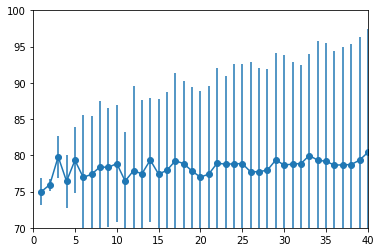

In [50]:
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(x=np.arange(1,len(Y)),y=accuracy)
plt.errorbar(x=np.arange(1,len(Y)),y=accuracy,yerr=accuracy_std,xerr=None,fmt="")
plt.xlim(0,40)
plt.ylim(70,100)
plt.show()

In [56]:
for i in range(0,60):
    RockMean,MineMean=DataFrame.groupby(DataFrame.columns[-1]).mean()[i]
    RockStd,MineStd=DataFrame.groupby(DataFrame.columns[-1]).std()[i]
    if abs(RockMean-RockStd)>=0.3:
        print(i)
#DataFrame.groupby(DataFrame.columns[-1]).std()

19
20
21
22
23
24
25
26
27
28
29
